In [ ]:
import os
import pandas as pd

# Define which actions are aggressive
AGGRESSIVE_ACTIONS = {
    "barking",
    "growling_clips",
    "teeth_chattring"
}

NOT_AGGRESSIVE_ACTIONS = {
    "wagging_tail",
    "chasing_toy",
    "panting",
    "playing",
    "eating_food",
    "drinking",
    "digging",
    "chewing",
    "jump",
    "howling",
    "rolling",
    "sitting",
    "sleeping"
}

def make_dataset_csv(dataset_dir, output_csv):
    data = []
    for action_folder in os.listdir(dataset_dir):
        action_path = os.path.join(dataset_dir, action_folder)
        if not os.path.isdir(action_path):
            continue
        
        # Decide label
        if action_folder in AGGRESSIVE_ACTIONS:
            label = "aggressive"
        elif action_folder in NOT_AGGRESSIVE_ACTIONS:
            label = "not_aggressive"
        else:
            label = "unknown"

        # Loop over videos
        for file in os.listdir(action_path):
            if file.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
                full_path = os.path.join(action_path, file)

                # Convert absolute path → relative path from dataset_dir
                rel_path = os.path.relpath(full_path, start=os.path.dirname(dataset_dir))

                data.append({
                    "video_path": rel_path.replace("\\", "/"),  # make paths universal
                    "action": action_folder,
                    "label": label
                })

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Shuffle rows randomly
    df = df.sample(frac=1, random_state=42).reset_index(drop=True) #entire row

    # Save CSV
    df.to_csv(output_csv, index=False)
    print(f"CSV saved at: {output_csv} with {len(df)} entries (shuffled)")

# Run
make_dataset_csv(
    dataset_dir=r"C:\Users\aliza\Desktop\og_behaviour\dataset_2",
    output_csv=r"C:\Users\aliza\Desktop\og_behaviour\dog_dataset_full_shuffled.csv"
)


CSV saved at: C:\Users\aliza\Desktop\og_behaviour\dog_dataset_full_shuffled.csv with 294 entries (shuffled)


In [15]:
df= pd.read_csv(r"C:\Users\aliza\Desktop\OG_BEHAVIOUR\dog_dataset_full_shuffled.csv")
df.sample(5)

,video_path,action,label
152,dataset_2/barking/barks_40.mp4,barking,aggressive
265,dataset_2/chewing/preview_12.mp4,chewing,not_aggressive
181,dataset_2/sitting/preview_14.mp4,sitting,not_aggressive
166,dataset_2/barking/barks_32.mp4,barking,aggressive
162,dataset_2/barking/barks_9.mp4,barking,aggressive


In [16]:
len(df)

294

In [17]:
df['action'].value_counts()

action
panting            80
barking            42
sleeping           41
rolling            33
sitting            18
chewing            16
playing            16
growling_clips     10
chasing_toy         9
jump                8
eating_food         6
teeth_chattring     5
drinking            4
howling             3
digging             2
wagging_tail        1
Name: count, dtype: int64

In [18]:
df['label'].value_counts()

label
not_aggressive    237
aggressive         57
Name: count, dtype: int64

<Axes: xlabel='label'>

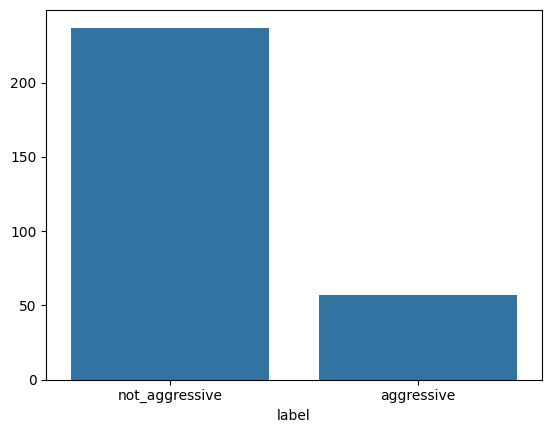

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=df['label'].value_counts().index, y=df['label'].value_counts().values)

In [ ]:
#adding video duration column
import cv2
import pandas as pd

# Load CSV
df = pd.read_csv(r"C:\Users\aliza\Desktop\og_behaviour\dog_dataset_full.csv") 

durations = []

for path in df['video_path']:
    cap = cv2.VideoCapture(path) #open
    if not cap.isOpened(): #check  if not successful 
        durations.append(None) # place none for duration 
        continue

    fps = cap.get(cv2.CAP_PROP_FPS)  #how may images are bing play per second
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT) 
    duration = total_frames / fps           # duration in seconds
    durations.append(duration)

    cap.release() #free space of variable

df['duration_sec'] = durations
print(df.head())


df.to_csv(r"C:\Users\aliza\Desktop\og_behaviour\dog_dataset_full_with_duration.csv", index=False)

                                          video_path       action       label  \
0  C:\Users\aliza\Desktop\og_behaviour\dataset_2\...  barks_clips  aggressive   
1  C:\Users\aliza\Desktop\og_behaviour\dataset_2\...  barks_clips  aggressive   
2  C:\Users\aliza\Desktop\og_behaviour\dataset_2\...  barks_clips  aggressive   
3  C:\Users\aliza\Desktop\og_behaviour\dataset_2\...  barks_clips  aggressive   
4  C:\Users\aliza\Desktop\og_behaviour\dataset_2\...  barks_clips  aggressive   

   duration_sec  
0          14.0  
1          15.0  
2          15.0  
3           5.0  
4          14.0  


In [ ]:
#yt
import os
dataset_path = os.listdir("dataset/train")

label_types = os.listdir('dog_dataset_split/train')
print(label_types)


['aggressive', 'not_aggressive']


In [ ]:

# ['dancing', 'exercise', 'yoga']

# Preparing Training Data

rooms = []

for item in dataset_path:
    # Get all the file names
    all_rooms = os.listdir('dog_dataset_augmantated/aggressive' + '/' + item)
    
    # Add them to the list
    for room in all_rooms:
        rooms.append((item, str('dataset/train' + '/' + item) + '/' + room))


In [ ]:
import pandas as pd
# Build a dataframe
train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(train_df.head())
print(train_df.tail())

df = train_df.loc[:, ['video_name', 'tag']]
df.to_csv('train.csv')


In [ ]:
#rough

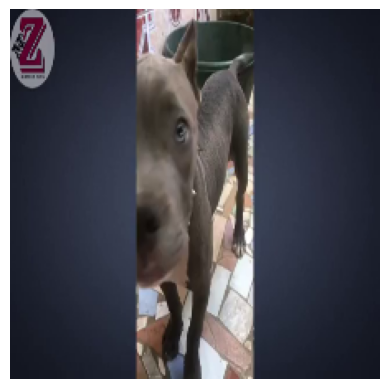

In [10]:
import cv2
import numpy as np

def extract_frames(video_path, num_frames=20):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames-1, num_frames, dtype=int)

    frames = []
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (224, 224))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
    cap.release()
    return frames  # list of numpy arrays

test_frame =extract_frames(r"C:\Users\aliza\Desktop\og_behaviour\dataset_2\barks_clips\barks_0.mp4", num_frames=5)

len(test_frame)  # Should print (224, 224, 3) for the first frame

import matplotlib.pyplot as plt

plt.imshow(test_frame[0])
plt.axis("off")
plt.show()


In [ ]:
#from yt videos



In [ ]:
#from gpt
import cv2
import torch
from ultralytics import YOLO
import os

yolo_model = YOLO("yolov8n.pt")  # small, fast model for detection

def extract_sequences(video_path, crop_out_dir, full_out_dir, seq_len=16):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()

    # Process frames
    for i in range(0, len(frames), seq_len):
        clip_frames = frames[i:i+seq_len]
        if len(clip_frames) < seq_len:
            continue  # skip incomplete sequences

        crop_seq = []
        full_seq = []
        for f in clip_frames:
            # Full frame
            f_full = cv2.resize(f, (224, 224))
            full_seq.append(f_full)

            # YOLO detection
            results = yolo_model(f, verbose=False)
            if len(results[0].boxes) > 0:
                box = results[0].boxes.xyxy[0].cpu().numpy().astype(int)
                x1, y1, x2, y2 = box
                f_crop = f[y1:y2, x1:x2]
            else:
                f_crop = f  # fallback: no detection

            f_crop = cv2.resize(f_crop, (224, 224))
            crop_seq.append(f_crop)

        # Save sequences
        crop_path = os.path.join(crop_out_dir, f"seq_{i}.pt")
        full_path = os.path.join(full_out_dir, f"seq_{i}.pt")
        
        torch.save(torch.tensor(crop_seq), crop_path)
        torch.save(torch.tensor(full_seq), full_path)


In [ ]:
from torch.utils.data import Dataset
import torch

class TwoStreamDataset(Dataset):
    def __init__(self, crop_dir, full_dir, labels_dict, transform=None):
        self.crop_files = sorted(os.listdir(crop_dir))
        self.full_files = sorted(os.listdir(full_dir))
        self.labels_dict = labels_dict
        self.transform = transform

    def __len__(self):
        return len(self.crop_files)

    def __getitem__(self, idx):
        crop_seq = torch.load(os.path.join(crop_dir, self.crop_files[idx])).permute(0, 3, 1, 2) / 255.0
        full_seq = torch.load(os.path.join(full_dir, self.full_files[idx])).permute(0, 3, 1, 2) / 255.0

        label_name = self.crop_files[idx].split("_")[0]
        label = torch.tensor(self.labels_dict[label_name], dtype=torch.long)

        if self.transform:
            crop_seq = torch.stack([self.transform(f) for f in crop_seq])
            full_seq = torch.stack([self.transform(f) for f in full_seq])

        return crop_seq, full_seq, label
